In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataframes created:

- df_zhvf = zillow home value forecast, most current month
- df_60657 = df of records from zip code 60657 (chicago, cook county)

In [2]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [3]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [4]:
def melt_data_return_melted(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [5]:
# importing data provided to us initially

df = pd.read_csv('../../src/data/zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [6]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [7]:
df.columns[7]

'1996-04'

In [8]:
type(df.columns[7])

str

In [9]:
df.iloc[:,7:]

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,92700.0,92500.0,92400.0,92200.0,92100.0,91900.0,91700.0,91300.0,90900.0,90500.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,57100.0,57300.0,57500.0,57700.0,58000.0,58200.0,58400.0,58700.0,59100.0,59500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,191100.0,192400.0,193700.0,195000.0,196300.0,197700.0,199100.0,200700.0,202600.0,204900.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [10]:
# using get_datetime(df) function to see what it does

get_datetimes(df.iloc[:,7:])

DatetimeIndex(['1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=264, freq=None)

In [11]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [12]:
type(df.columns[7])

str

In [14]:
df_lf = melt_data_return_melted(df)
df_lf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [15]:
df_lf.set_index('time', inplace=True)
df_lf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0


In [16]:
df_lf.isnull().sum()

RegionID           0
RegionName         0
City               0
State              0
Metro         236023
CountyName         0
SizeRank           0
value              0
dtype: int64

---

## Exploring NaNs in Metro column

Concluded that it won't matter much in our analysis.
So we're going to leave it as is

In [ ]:
df_lf[df_lf['Metro'].isnull()]['State'].value_counts()

In [ ]:
df_lf[(df_lf['Metro'].isnull()) & (df_lf['State'] == 'GA')]['RegionName'].value_counts()

In [ ]:
df_lf[(df_lf['Metro'].isnull()) & (df_lf['State'] == 'GA') & (df_lf['RegionName'] == 30528)]

---

# DICKY FULLER TEST

Dickey_Fuller test: If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary

test_stat < critical_val = stationary

In [73]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

## 60657

In [70]:
df_lf_60657_values = df_lf[(df_lf.RegionName == 60657)].value
df_lf_60657_values.head()

time
1996-04-01    334200.0
1996-05-01    335400.0
1996-06-01    336500.0
1996-07-01    337600.0
1996-08-01    338500.0
Name: value, dtype: float64

#### **NO DIFFERENCING**

test statistic > crictical value of 5%

FAILED STATIONARITY 

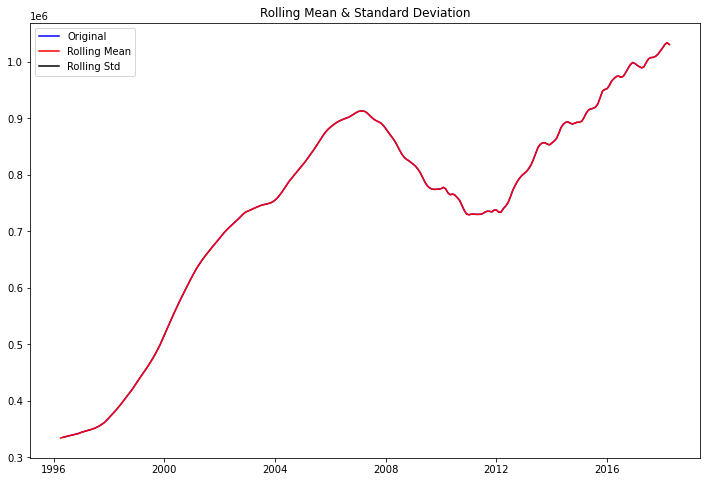

Results of Dickey-Fuller Test:
Test Statistic                  -2.298046
p-value                          0.172599
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [81]:
test_stationarity(df_lf_60657_values, 1)

#### **DIFFERENCING- ORDER OF 1**

FAILED

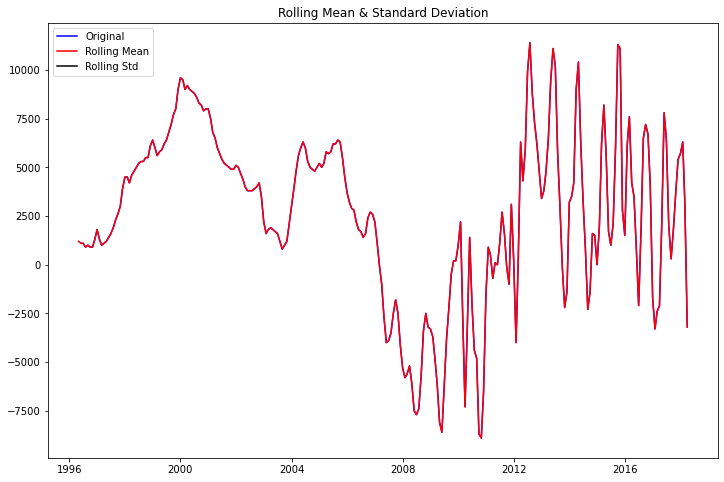

Results of Dickey-Fuller Test:
Test Statistic                  -1.942973
p-value                          0.312123
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [82]:
test_stationarity(df_lf_60657_values.diff().dropna(), 1)

#### **DIFFERENCING- ORDER OF 2**

PASSED

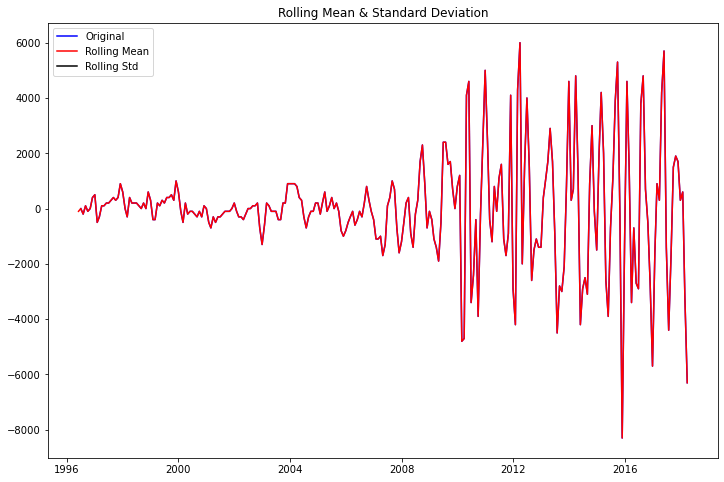

Results of Dickey-Fuller Test:
Test Statistic                  -3.771928
p-value                          0.003208
#Lags Used                      16.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


In [126]:
test_stationarity(df_lf_60657_values.diff().diff().dropna(), 1)

## 30326

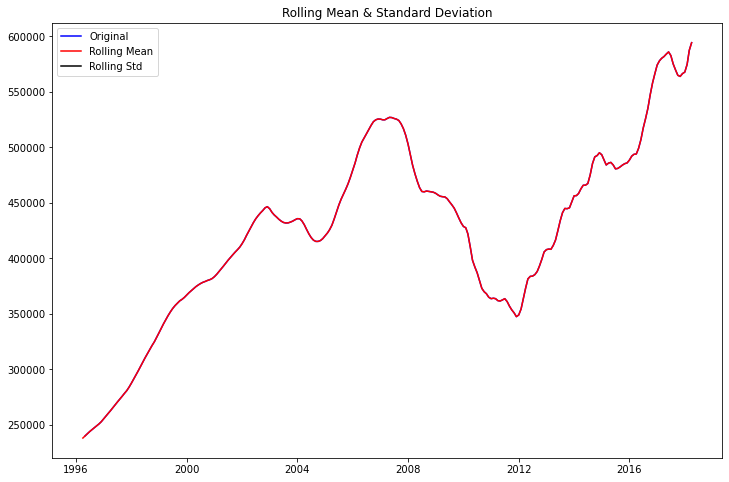

Results of Dickey-Fuller Test:
Test Statistic                  -1.528199
p-value                          0.519518
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [149]:
test_stationarity(df_atl.value, 1)

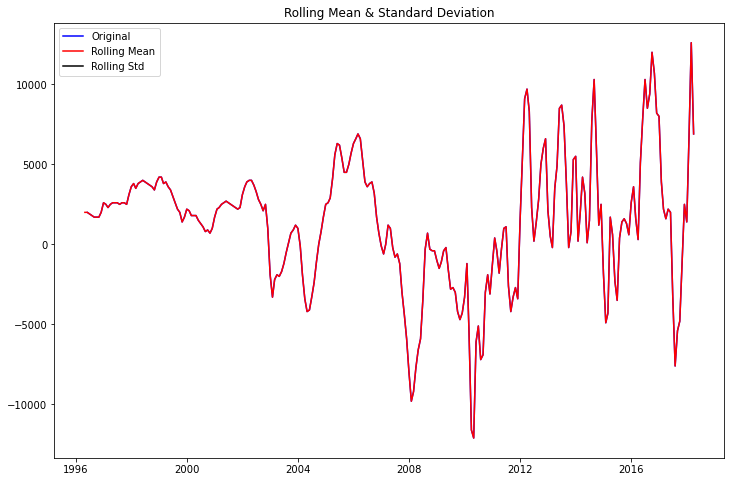

Results of Dickey-Fuller Test:
Test Statistic                  -3.406792
p-value                          0.010729
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [153]:
test_stationarity(df_atl['value'].diff().dropna(), 1)

## 11363

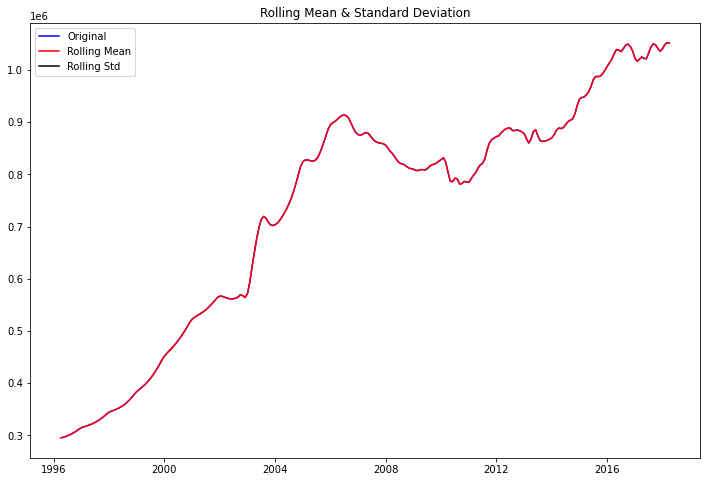

Results of Dickey-Fuller Test:
Test Statistic                  -1.610476
p-value                          0.477726
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [155]:
test_stationarity(df_ny.value, 1)

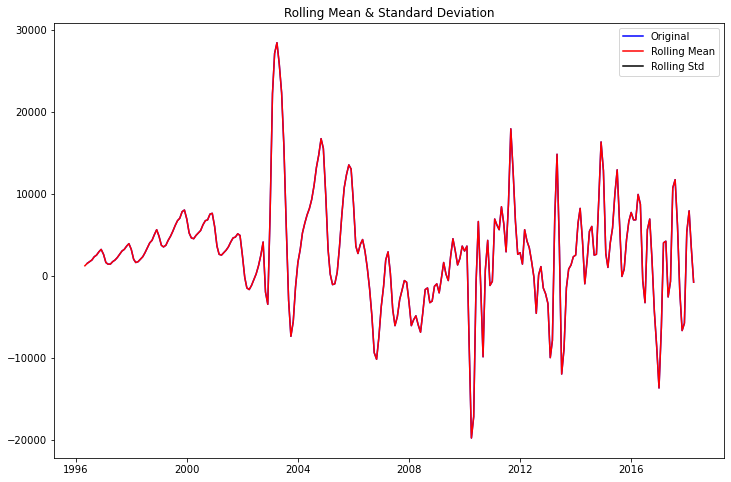

Results of Dickey-Fuller Test:
Test Statistic                  -2.352933
p-value                          0.155463
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [157]:
test_stationarity(df_ny.value.diff().dropna(), 1)

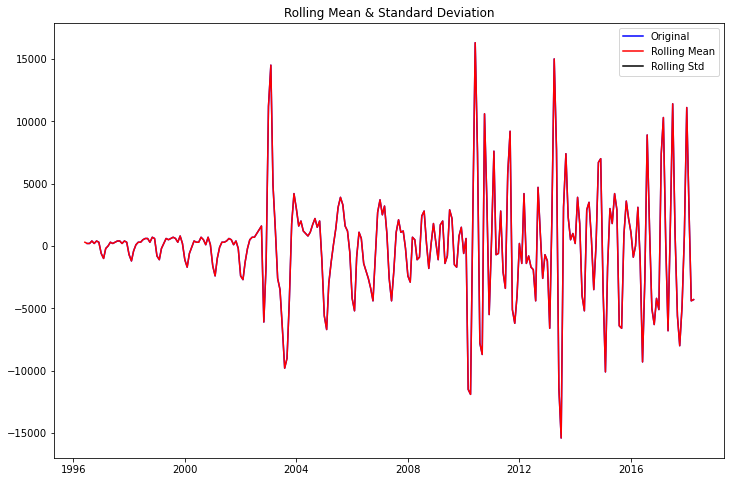

Results of Dickey-Fuller Test:
Test Statistic                -7.029197e+00
p-value                        6.248943e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


In [158]:
test_stationarity(df_ny.value.diff().diff().dropna(), 1)

In [165]:
test_stationarity(df_zip_code_train, 1) #copy/pasted this from 2nd notebook. This is for the train data we're using in our model.

NameError: name 'df_zip_code_train' is not defined

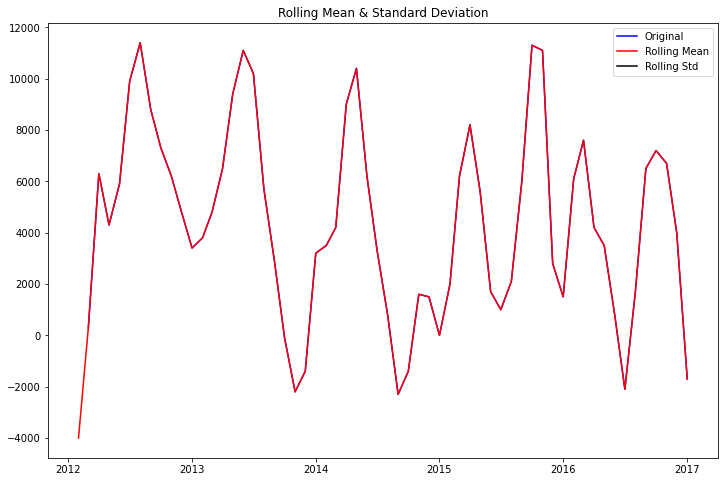

Results of Dickey-Fuller Test:
Test Statistic                 -2.023434
p-value                         0.276394
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [230]:
test_stationarity(df_zip_code_train.diff().dropna(), 1)

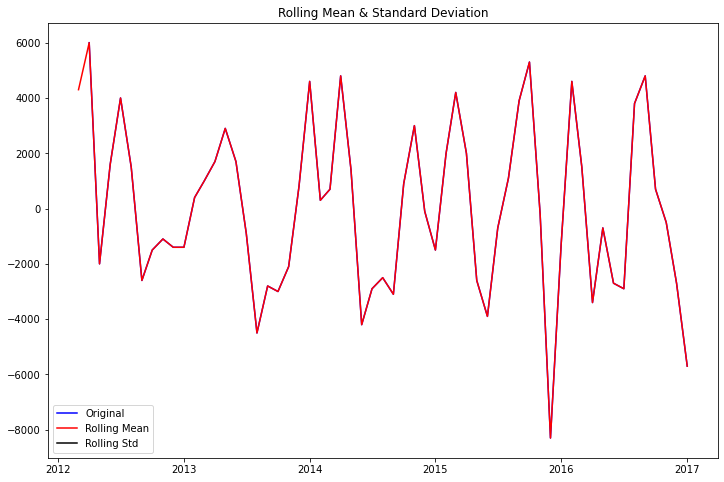

Results of Dickey-Fuller Test:
Test Statistic                 -2.407341
p-value                         0.139675
#Lags Used                     10.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [219]:
test_stationarity(df_zip_code_train.diff().diff().dropna(), 1)

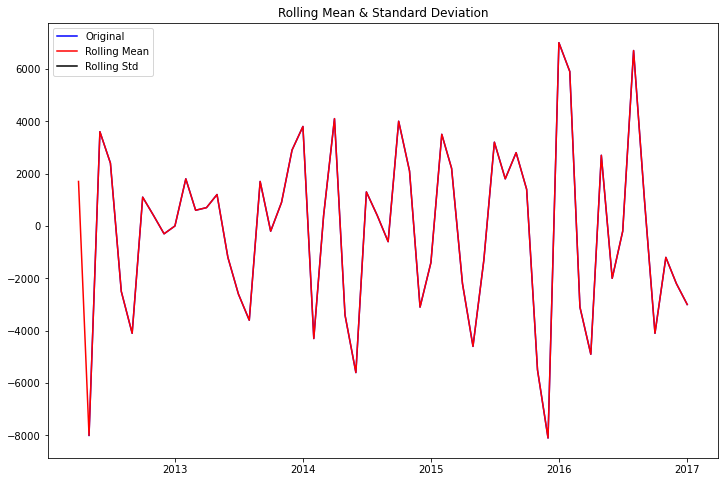

Results of Dickey-Fuller Test:
Test Statistic                 -4.993342
p-value                         0.000023
#Lags Used                     11.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [222]:
test_stationarity(df_zip_code_train.diff().diff().diff().dropna(), 1)

### trying to get individual stats from the dicky_fuller test:

In [160]:
dftest = adfuller(df_lf_60657_values.diff().diff().dropna(), autolag='AIC')
dftest

(-3.77192794028896,
 0.0032079473310569957,
 16,
 246,
 {'1%': -3.457215237265747,
  '5%': -2.873361841566324,
  '10%': -2.5730700760129555},
 4246.132241109706)

In [161]:
test_stat = dftest[0]
critical_val_5 = dftest[4]['5%']

print(test_stat, critical_val_5, test_stat < critical_val_5)

# test_stat < critical_val = stationary

-3.77192794028896 -2.873361841566324 True


In [162]:
from statsmodels.tsa.stattools import adfuller

def dicky_fuller(df):
    i = 0
    dftest = adfuller(np.diff(df,i), autolag='AIC')
    test_stat = dftest[0]
    critical_val_5 = dftest[4]['5%']
    while test_stat > critical_val_5:
        i+=1
        dftest = adfuller(np.diff(df,i), autolag='AIC')
        test_stat = dftest[0]
        critical_val_5 = dftest[4]['5%']
    return(i)
    
dicky_fuller(df_atl.value)

1

In [163]:
dicky_fuller(df_ny.value)

2

In [164]:
dicky_fuller(df_lf_60657_values)

2

---

## Exploring the relationship between time and location

Each time should be repeated the same amount of time if every city has the same timestamp.

In [17]:
df_lf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0


In [18]:
df_lf.RegionName.value_counts()

28658    265
94957    265
80610    265
49885    265
60120    265
        ... 
28088     46
47336     46
73173     46
53015     46
62215     46
Name: RegionName, Length: 14723, dtype: int64

In [ ]:
df_lf.RegionName.value_counts().value_counts()

In [19]:
df_lf[(df_lf.RegionName == 60657)]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-05-01,84654,60657,Chicago,IL,Chicago,Cook,1,335400.0
1996-06-01,84654,60657,Chicago,IL,Chicago,Cook,1,336500.0
1996-07-01,84654,60657,Chicago,IL,Chicago,Cook,1,337600.0
1996-08-01,84654,60657,Chicago,IL,Chicago,Cook,1,338500.0
...,...,...,...,...,...,...,...,...
2017-12-01,84654,60657,Chicago,IL,Chicago,Cook,1,1018700.0
2018-01-01,84654,60657,Chicago,IL,Chicago,Cook,1,1024400.0
2018-02-01,84654,60657,Chicago,IL,Chicago,Cook,1,1030700.0


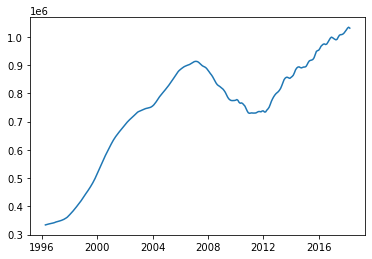

In [21]:
plt.plot(df_lf[(df_lf.RegionName == 60657)]['value'])

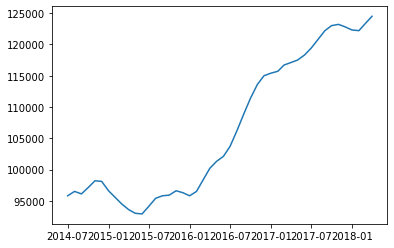

In [89]:
plt.plot(df_lf[(df_lf.RegionName == 28088)]['value']);

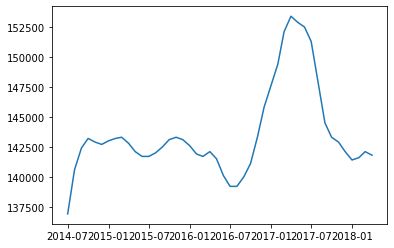

In [88]:
plt.plot(df_lf[(df_lf.RegionName == 62215)]['value']);

In [94]:
df_lf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0


In [96]:
df_lf.to_csv('../../src/data/df_lf_arima.csv')

---

## Zillow Home Value Forecast

can't seem to download, but the link is a .csv

In [ ]:
df_zhvf = pd.read_csv('http://files.zillowstatic.com/research/public_v2/zhvf/AllRegionsForPublic.csv')
df_zhvf.head()

In [ ]:
df_zhvf.shape

In [ ]:
df_zhvf.Region.value_counts()

In [ ]:
df_zhvf[df_zhvf['Region'] == 'Zip']

In [ ]:
df_lf.RegionName.value_counts()

---

# Looking for different zip codes

### Atlanta

In [118]:
df_lf[(df_lf.City == 'Atlanta')]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,71050,30331,Atlanta,GA,Atlanta,Fulton,228,97100.0
1996-04-01,71029,30309,Atlanta,GA,Atlanta,Fulton,1098,260400.0
1996-04-01,71043,30324,Atlanta,GA,Atlanta,Fulton,1224,189400.0
1996-04-01,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0
1996-04-01,71025,30305,Atlanta,GA,Atlanta,Fulton,1788,297200.0
...,...,...,...,...,...,...,...,...
2018-04-01,71045,30326,Atlanta,GA,Atlanta,Fulton,7642,594400.0
2018-04-01,90965,75551,Atlanta,TX,NaN,Cass,7765,102200.0
2018-04-01,71079,30363,Atlanta,GA,Atlanta,Fulton,10215,340300.0


In [144]:
zip_code = 30326

df_atl = df_lf[(df_lf.RegionName== zip_code)]

df_atl.value.mean()

424801.1320754717

### Chicago

In [117]:
zip_code = 60657

df_chicago = df_lf[(df_lf.RegionName== zip_code)]

df_chicago.value.mean()

743978.8679245283

### New York

In [106]:
df_lf[df_lf.City == 'New York']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,61807,10467,New York,NY,New York,Bronx,7,152900.0
1996-04-01,62037,11226,New York,NY,New York,Kings,11,162000.0
1996-04-01,62087,11375,New York,NY,New York,Queens,13,252400.0
1996-04-01,62045,11235,New York,NY,New York,Kings,14,190500.0
1996-04-01,61703,10128,New York,NY,New York,New York,22,3676700.0
...,...,...,...,...,...,...,...,...
2018-04-01,62122,11436,New York,NY,New York,Queens,8009,400300.0
2018-04-01,62078,11366,New York,NY,New York,Queens,8304,893600.0
2018-04-01,61783,10307,New York,NY,New York,Richmond,8388,575900.0


In [122]:
zip_code = 11363

df_ny = df_lf[(df_lf.RegionName== zip_code)]

df_ny.value.mean()

735301.1320754717